In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns

import os
import utils
from tqdm import tqdm_notebook
from sklearn.model_selection import train_test_split
import multiprocessing
import json

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader

In [2]:
import data, model, interpretation, utils, vis_utils, glm

In [3]:
test_data = np.load("test_data.npy")
test_label = np.load("test_label.npy")

test_data = np.reshape(test_data, (251, 1, 64, 64, 64))

# Initialize confounder pretrained model

In [4]:
mask = glm.perform_glm()
confounder_mod = model.Confounder3DCNN(mask=mask, in_num_ch=1, img_size=(64,64,64), inter_num_ch=16, fc_num_ch=16,
                                    conv_act='relu', fc_act='tanh').to(torch.device('cpu'))

cannot convert 
cannot convert 
cannot convert 
cannot convert 
number of examples:  1334
number of unmatched examples: 0
[70.8 70.8 70.8 82.2 82.2 82.2 82.2 88.6 88.6 88.6 88.6 84.9 70.7 70.7
 70.7 70.7 70.7 70.7 70.7 71.5 71.5 71.5 71.5 74.4 74.4 74.4 74.  74.
 74.5 74.5 74.5 74.5 73.4 64.9 64.9 64.9 64.9 76.6 76.6 76.6 75.8 75.8
 75.8 75.8 75.3 74.9 74.9 74.9 74.9 74.9 83.  83.  83.  83.  80.2 81.3
 81.3 81.3 81.3 81.3 86.3 78.5 78.5 78.5 74.5 74.5 74.5 74.5 72.2 72.2
 70.1 70.1 70.1 70.1 70.1 70.1 70.1 77.  77.  77.  77.  70.6 70.6 70.6
 70.6 70.6 70.6 77.2 77.2 77.2 75.3 75.3 75.3 75.3 70.5 70.5 70.5 70.5
 70.5 71.1 71.1 71.1 87.6 87.6 87.6 87.6 87.6 78.6 78.6 57.1 57.1 57.1
 57.1 78.3 78.3 78.3 78.3 78.3 77.6 77.6 78.3 78.3 78.3 78.3 78.3 62.
 62.  62.  62.  62.  77.1 77.1 77.1 76.9 76.9 76.9 77.3 77.3 71.4 71.4
 71.4 71.4 71.4 70.6 70.6 70.6 70.6 77.3 77.3 77.3 77.3 79.2 79.2 74.8
 74.8 77.4 62.  74.6 74.6 74.6 74.6 71.  78.  82.6 85.1 85.1 85.1 76.7
 76.7 76.7 77.3 77.3 77.3 77

/Users/elissali/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:176: RuntimeWarning: invalid value encountered in true_divide
  return np.sum(resid_dev * freq_weights * var_weights / scale)


i:  175
i:  176
i:  177
i:  178
i:  179
i:  180
i:  181
i:  182
i:  183
i:  184
i:  185
i:  186
i:  187
i:  188
i:  189
i:  190
i:  191
i:  192
i:  193
i:  194
i:  195
i:  196
i:  197
i:  198
i:  199
i:  200
i:  201
i:  202
i:  203
i:  204
i:  205
i:  206
i:  207
i:  208
i:  209
i:  210
i:  211
i:  212
i:  213
i:  214
i:  215
i:  216
i:  217
i:  218
i:  219
i:  220
i:  221
i:  222
i:  223
i:  224
i:  225
i:  226
i:  227
i:  228
i:  229
i:  230
i:  231
i:  232
i:  233
i:  234
i:  235
i:  236
i:  237
i:  238
i:  239
i:  240
i:  241
i:  242
i:  243
i:  244
i:  245
i:  246
i:  247
i:  248
i:  249
i:  250
i:  251
i:  252
i:  253
i:  254
i:  255
i:  256
i:  257
i:  258
i:  259
i:  260
i:  261
i:  262
i:  263
i:  264
i:  265
i:  266
i:  267
i:  268
i:  269
i:  270
i:  271
i:  272
i:  273
i:  274
i:  275
i:  276
i:  277
i:  278
i:  279
i:  280
i:  281
i:  282
i:  283
i:  284
i:  285
i:  286
i:  287
i:  288
i:  289
i:  290
i:  291
i:  292
i:  293
i:  294
i:  295
i:  296
i:  297
i:  298
i:  299


In [5]:
brain_map = vis_utils.load_nifti('aal.nii.gz')
brain_areas = np.unique(brain_map)[1:]  # omit background

area_masks = []
for area in tqdm_notebook(brain_areas):
    area_mask = np.zeros_like(brain_map)
    area_mask[brain_map == area] = 1
    area_mask = vis_utils.resize_image(area_mask, (64, 64, 64), interpolation=0)
    area_masks.append(area_mask)

area_names = ['Precentral_L', 'Precentral_R', 'Frontal_Sup_L', 'Frontal_Sup_R', 'Frontal_Sup_Orb_L', 'Frontal_Sup_Orb_R', 'Frontal_Mid_L', 'Frontal_Mid_R', 'Frontal_Mid_Orb_L', 'Frontal_Mid_Orb_R', 'Frontal_Inf_Oper_L', 'Frontal_Inf_Oper_R', 'Frontal_Inf_Tri_L', 'Frontal_Inf_Tri_R', 'Frontal_Inf_Orb_L', 'Frontal_Inf_Orb_R', 'Rolandic_Oper_L', 'Rolandic_Oper_R', 'Supp_Motor_Area_L', 'Supp_Motor_Area_R', 'Olfactory_L', 'Olfactory_R', 'Frontal_Sup_Medial_L', 'Frontal_Sup_Medial_R', 'Frontal_Med_Orb_L', 'Frontal_Med_Orb_R', 'Rectus_L', 'Rectus_R', 'Insula_L', 'Insula_R', 'Cingulum_Ant_L', 'Cingulum_Ant_R', 'Cingulum_Mid_L', 'Cingulum_Mid_R', 'Cingulum_Post_L', 'Cingulum_Post_R', 'Hippocampus_L', 'Hippocampus_R', 'ParaHippocampal_L', 'ParaHippocampal_R', 'Amygdala_L', 'Amygdala_R', 'Calcarine_L', 'Calcarine_R', 'Cuneus_L', 'Cuneus_R', 'Lingual_L', 'Lingual_R', 'Occipital_Sup_L', 'Occipital_Sup_R', 'Occipital_Mid_L', 'Occipital_Mid_R', 'Occipital_Inf_L', 'Occipital_Inf_R', 'Fusiform_L', 'Fusiform_R', 'Postcentral_L', 'Postcentral_R', 'Parietal_Sup_L', 'Parietal_Sup_R', 'Parietal_Inf_L', 'Parietal_Inf_R', 'SupraMarginal_L', 'SupraMarginal_R', 'Angular_L', 'Angular_R', 'Precuneus_L', 'Precuneus_R', 'Paracentral_Lobule_L', 'Paracentral_Lobule_R', 'Caudate_L', 'Caudate_R', 'Putamen_L', 'Putamen_R', 'Pallidum_L', 'Pallidum_R', 'Thalamus_L', 'Thalamus_R', 'Heschl_L', 'Heschl_R', 'Temporal_Sup_L', 'Temporal_Sup_R', 'Temporal_Pole_Sup_L', 'Temporal_Pole_Sup_R', 'Temporal_Mid_L', 'Temporal_Mid_R', 'Temporal_Pole_Mid_L', 'Temporal_Pole_Mid_R', 'Temporal_Inf_L', 'Temporal_Inf_R', 'Cerebelum_Crus1_L', 'Cerebelum_Crus1_R', 'Cerebelum_Crus2_L', 'Cerebelum_Crus2_R', 'Cerebelum_3_L', 'Cerebelum_3_R', 'Cerebelum_4_5_L', 'Cerebelum_4_5_R', 'Cerebelum_6_L', 'Cerebelum_6_R', 'Cerebelum_7b_L', 'Cerebelum_7b_R', 'Cerebelum_8_L', 'Cerebelum_8_R', 'Cerebelum_9_L', 'Cerebelum_9_R', 'Cerebelum_10_L', 'Cerebelum_10_R', 'Vermis_1_2', 'Vermis_3', 'Vermis_4_5', 'Vermis_6', 'Vermis_7', 'Vermis_8', 'Vermis_9', 'Vermis_10']

# Merge left and right areas.
merged_area_names = [name[:-2] for name in area_names[:108:2]] + area_names[108:]

In [6]:
def get_relevance_per_area(relevance_map, normalize=True):
    relevances = np.zeros(len(area_masks))
    print(relevances.shape)
    for i, area_mask in enumerate(area_masks):
        relevances[i] = np.sum(relevance_map * area_mask)
    if normalize:
        relevances /= relevances.sum()  # make all areas sum to 1

    # Merge left and right areas.
    merged_relevances = np.concatenate([relevances[:108].reshape(-1, 2).sum(1), relevances[108:]])

    return sorted(zip(merged_area_names, merged_relevances), key=lambda x: x[1], reverse=True)

# Sensitivity analysis

In [0]:
# shape: (1, 64, 64, 64)
# relevance maps; to be averaged after summing
map_AD_correct = np.zeros((1, 64, 64, 64))
map_AD_wrong = np.zeros((1, 64, 64, 64))
map_NC_correct = np.zeros((1, 64, 64, 64))
map_NC_wrong = np.zeros((1, 64, 64, 64))
map_AD = np.zeros((1, 64, 64, 64))
map_NC = np.zeros((1, 64, 64, 64))

# counts... to keep track and average later
count_AD_correct = 0
count_AD_wrong = 0
count_NC_correct = 0
count_NC_wrong = 0
count_AD = 0
count_NC = 0

# average of test images
img_AD_correct = np.zeros((64, 64, 64))
img_AD_wrong = np.zeros((64, 64, 64))
img_NC_correct = np.zeros((64, 64, 64))
img_NC_wrong = np.zeros((64, 64, 64))
img_AD = np.zeros((64, 64, 64))
img_NC = np.zeros((64, 64, 64))
img_global = np.zeros((64, 64, 64)) # average of entire dataset

# dict of top brain areas; to be summed
dict_AD_correct = {}
dict_AD_wrong = {}
dict_NC_correct = {}
dict_NC_wrong = {}
dict_AD = {}
dict_NC = {}

for i in range(251):
  #if i % 20 == 0:
  print("i: ", i)
  label = test_label[i]
  relevance_map_backprop, pred_label, _ = interpretation.sensitivity_analysis(confounder_mod, test_data[i], cuda=False, verbose=True)
  case = -1
  if label == 1 and pred_label == 1:
    case = 1
    count_AD_correct += 1
    img_AD_correct += test_data[i][0]
    map_AD_correct += relevance_map_backprop
  elif label == 1 and pred_label == 0:
    case = 2
    count_AD_wrong += 1
    img_AD_wrong += test_data[i][0]
    map_AD_wrong += relevance_map_backprop
  elif label == 0 and pred_label == 0:
    case = 3
    count_NC_correct += 1
    img_NC_correct += test_data[i][0]
    map_NC_correct += relevance_map_backprop
  elif label == 0 and pred_label == 1:
    case = 4
    count_NC_wrong += 1
    img_NC_wrong += test_data[i][0]
    map_NC_wrong += relevance_map_backprop
  else:
    print("entered invalid case with (label, pred_label) = ", label, pred_label)
  
  areas_top_ten = get_relevance_per_area(relevance_map_backprop[0])[:10]
  dict_example = None
  if case == 1:
    dict_example = dict_AD_correct
  elif case == 2:
    dict_example = dict_AD_wrong
  elif case == 3:
    dict_example = dict_NC_correct
  elif case == 4:
    dict_example = dict_NC_wrong
  else: 
    print("invalid case ", case)
  for (area, pct) in areas_top_ten:
    if area in dict_example:
      dict_example[area] += pct
    else:
      dict_example[area] = pct

i:  0
torch.Size([1, 64])
tensor([[-6.2697]], grad_fn=<AddmmBackward>) torch.Size([1, 1])
Image was classified as 0 with probability 0.9981107680359855
one hot output:  tensor([[[1.],
         [0.]]])
(116,)
i:  1
torch.Size([1, 64])
tensor([[-5.2246]], grad_fn=<AddmmBackward>) torch.Size([1, 1])
Image was classified as 0 with probability 0.9946462898515165
one hot output:  tensor([[[1.],
         [0.]]])
(116,)
i:  2
torch.Size([1, 64])
tensor([[-5.6536]], grad_fn=<AddmmBackward>) torch.Size([1, 1])
Image was classified as 0 with probability 0.9965074765495956
one hot output:  tensor([[[1.],
         [0.]]])
(116,)
i:  3
torch.Size([1, 64])
tensor([[5.4695]], grad_fn=<AddmmBackward>) torch.Size([1, 1])
Image was classified as 1 with probability 0.9958043694496155
one hot output:  tensor([[[0.],
         [1.]]])
(116,)
i:  4
torch.Size([1, 64])
tensor([[6.3006]], grad_fn=<AddmmBackward>) torch.Size([1, 1])
Image was classified as 1 with probability 0.9981681108474731
one hot output:  t

(116,)
i:  40
torch.Size([1, 64])
tensor([[-4.2433]], grad_fn=<AddmmBackward>) torch.Size([1, 1])
Image was classified as 0 with probability 0.985842882655561
one hot output:  tensor([[[1.],
         [0.]]])
(116,)
i:  41
torch.Size([1, 64])
tensor([[-3.4229]], grad_fn=<AddmmBackward>) torch.Size([1, 1])
Image was classified as 0 with probability 0.9684119001030922
one hot output:  tensor([[[1.],
         [0.]]])
(116,)
i:  42
torch.Size([1, 64])
tensor([[-4.8692]], grad_fn=<AddmmBackward>) torch.Size([1, 1])
Image was classified as 0 with probability 0.9923793380148709
one hot output:  tensor([[[1.],
         [0.]]])
(116,)
i:  43
torch.Size([1, 64])
tensor([[-4.1736]], grad_fn=<AddmmBackward>) torch.Size([1, 1])
Image was classified as 0 with probability 0.9848361797630787
one hot output:  tensor([[[1.],
         [0.]]])
(116,)
i:  44
torch.Size([1, 64])
tensor([[-6.2598]], grad_fn=<AddmmBackward>) torch.Size([1, 1])
Image was classified as 0 with probability 0.9980919655645266
one h

(116,)
i:  80
torch.Size([1, 64])
tensor([[-4.8987]], grad_fn=<AddmmBackward>) torch.Size([1, 1])
Image was classified as 0 with probability 0.9925988079048693
one hot output:  tensor([[[1.],
         [0.]]])
(116,)
i:  81
torch.Size([1, 64])
tensor([[-2.4312]], grad_fn=<AddmmBackward>) torch.Size([1, 1])
Image was classified as 0 with probability 0.9191735535860062
one hot output:  tensor([[[1.],
         [0.]]])
(116,)
i:  82
torch.Size([1, 64])
tensor([[2.6475]], grad_fn=<AddmmBackward>) torch.Size([1, 1])
Image was classified as 1 with probability 0.9338552951812744
one hot output:  tensor([[[0.],
         [1.]]])
(116,)
i:  83
torch.Size([1, 64])
tensor([[0.1214]], grad_fn=<AddmmBackward>) torch.Size([1, 1])
Image was classified as 1 with probability 0.5303128361701965
one hot output:  tensor([[[0.],
         [1.]]])
(116,)
i:  84
torch.Size([1, 64])
tensor([[2.7221]], grad_fn=<AddmmBackward>) torch.Size([1, 1])
Image was classified as 1 with probability 0.9383201003074646
one hot

(116,)
i:  120
torch.Size([1, 64])
tensor([[-6.3216]], grad_fn=<AddmmBackward>) torch.Size([1, 1])
Image was classified as 0 with probability 0.9982061285991222
one hot output:  tensor([[[1.],
         [0.]]])
(116,)
i:  121
torch.Size([1, 64])
tensor([[-6.3117]], grad_fn=<AddmmBackward>) torch.Size([1, 1])
Image was classified as 0 with probability 0.998188346857205
one hot output:  tensor([[[1.],
         [0.]]])
(116,)
i:  122
torch.Size([1, 64])
tensor([[-6.3530]], grad_fn=<AddmmBackward>) torch.Size([1, 1])
Image was classified as 0 with probability 0.9982614270411432
one hot output:  tensor([[[1.],
         [0.]]])
(116,)
i:  123
torch.Size([1, 64])
tensor([[-6.3214]], grad_fn=<AddmmBackward>) torch.Size([1, 1])
Image was classified as 0 with probability 0.9982058451278135
one hot output:  tensor([[[1.],
         [0.]]])
(116,)
i:  124
torch.Size([1, 64])
tensor([[-6.3378]], grad_fn=<AddmmBackward>) torch.Size([1, 1])
Image was classified as 0 with probability 0.9982349061174318


(116,)
i:  160
torch.Size([1, 64])
tensor([[-3.8674]], grad_fn=<AddmmBackward>) torch.Size([1, 1])
Image was classified as 0 with probability 0.9795156307518482
one hot output:  tensor([[[1.],
         [0.]]])
(116,)
i:  161
torch.Size([1, 64])
tensor([[-5.8583]], grad_fn=<AddmmBackward>) torch.Size([1, 1])
Image was classified as 0 with probability 0.9971520532853901
one hot output:  tensor([[[1.],
         [0.]]])
(116,)
i:  162
torch.Size([1, 64])
tensor([[6.0360]], grad_fn=<AddmmBackward>) torch.Size([1, 1])
Image was classified as 1 with probability 0.9976145029067993
one hot output:  tensor([[[0.],
         [1.]]])
(116,)
i:  163
torch.Size([1, 64])
tensor([[6.1070]], grad_fn=<AddmmBackward>) torch.Size([1, 1])
Image was classified as 1 with probability 0.9977777600288391
one hot output:  tensor([[[0.],
         [1.]]])
(116,)
i:  164
torch.Size([1, 64])
tensor([[-5.9885]], grad_fn=<AddmmBackward>) torch.Size([1, 1])
Image was classified as 0 with probability 0.997498951619491
on

(116,)
i:  200
torch.Size([1, 64])
tensor([[-5.7452]], grad_fn=<AddmmBackward>) torch.Size([1, 1])
Image was classified as 0 with probability 0.9968122523277998
one hot output:  tensor([[[1.],
         [0.]]])
(116,)
i:  201
torch.Size([1, 64])
tensor([[-4.9946]], grad_fn=<AddmmBackward>) torch.Size([1, 1])
Image was classified as 0 with probability 0.9932713024318218
one hot output:  tensor([[[1.],
         [0.]]])
(116,)
i:  202
torch.Size([1, 64])
tensor([[-0.3940]], grad_fn=<AddmmBackward>) torch.Size([1, 1])
Image was classified as 0 with probability 0.5972410142421722
one hot output:  tensor([[[1.],
         [0.]]])
(116,)
i:  203
torch.Size([1, 64])
tensor([[-6.3778]], grad_fn=<AddmmBackward>) torch.Size([1, 1])
Image was classified as 0 with probability 0.9983040587976575
one hot output:  tensor([[[1.],
         [0.]]])
(116,)
i:  204
torch.Size([1, 64])
tensor([[-6.3667]], grad_fn=<AddmmBackward>) torch.Size([1, 1])
Image was classified as 0 with probability 0.9982851935783401

tensor([[2.3731]], grad_fn=<AddmmBackward>) torch.Size([1, 1])
Image was classified as 1 with probability 0.914749801158905
one hot output:  tensor([[[0.],
         [1.]]])
(116,)
i:  240
torch.Size([1, 64])
tensor([[-5.0308]], grad_fn=<AddmmBackward>) torch.Size([1, 1])
Image was classified as 0 with probability 0.9935090006329119
one hot output:  tensor([[[1.],
         [0.]]])
(116,)
i:  241
torch.Size([1, 64])
tensor([[5.6711]], grad_fn=<AddmmBackward>) torch.Size([1, 1])
Image was classified as 1 with probability 0.9965676069259644
one hot output:  tensor([[[0.],
         [1.]]])
(116,)
i:  242
torch.Size([1, 64])
tensor([[5.8585]], grad_fn=<AddmmBackward>) torch.Size([1, 1])
Image was classified as 1 with probability 0.9971524477005005
one hot output:  tensor([[[0.],
         [1.]]])
(116,)
i:  243
torch.Size([1, 64])
tensor([[-5.7416]], grad_fn=<AddmmBackward>) torch.Size([1, 1])
Image was classified as 0 with probability 0.9968007707502693
one hot output:  tensor([[[1.],
      

In [0]:
# some post-processing
map_AD = map_AD_correct + map_AD_wrong
map_NC = map_NC_correct + map_NC_wrong
count_AD = count_AD_correct + count_AD_wrong
count_NC = count_NC_correct + count_NC_wrong
img_AD = img_AD_correct + img_AD_wrong 
img_NC = img_NC_correct + img_NC_wrong
img_global = img_AD + img_NC

dict_AD = data.merge_dicts(dict_AD_correct, dict_AD_wrong)
dict_NC = data.merge_dicts(dict_NC_correct, dict_NC_wrong)

In [0]:
print(count_AD_correct, count_AD_wrong, count_NC_correct, count_NC_wrong)

57 32 148 14


In [0]:
# we need to average the maps across the number of examples that were summed up
map_AD_correct /= count_AD_correct
map_AD_wrong /= count_AD_wrong
map_NC_correct /= count_NC_correct
map_NC_wrong /= count_NC_wrong
map_AD /= count_AD
map_NC /= count_NC

# also average the images
img_AD_correct /= count_AD_correct
img_AD_wrong /= count_AD_wrong
img_NC_correct /= count_NC_correct
img_NC_wrong /= count_NC_wrong
img_AD /= count_AD
img_NC /= count_NC
img_global /= 251

-0.7620625321536576 1.9976536631661175 1.7443401181328926e-09 0.005458625004726601
-0.7620625321536576 1.9976536631661175 1.1921980409861825e-09 0.004634474135921827
-0.7620625321536576 1.9976536631661175 2.7444089667763084e-10 0.001409785548733572
-0.7620625321536576 1.9976536631661175 2.1824550811160225e-09 0.011750303951793316
-0.7620625321536576 1.9976536631661175 1.5458171241026148e-09 0.0046739994524539
-0.7620625321536576 1.9976536631661175 4.3933101138218316e-10 0.0021068407115510364


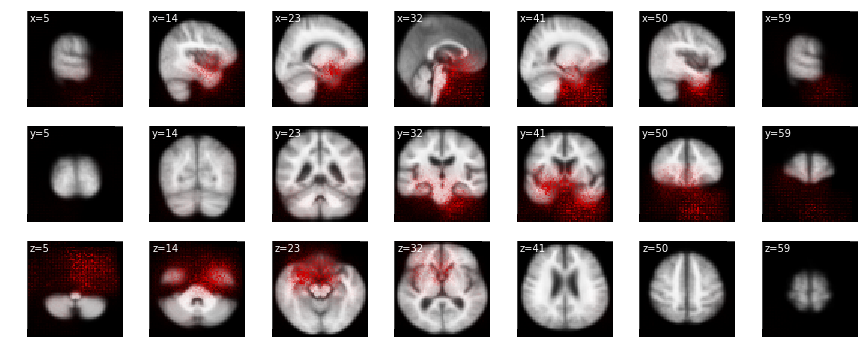

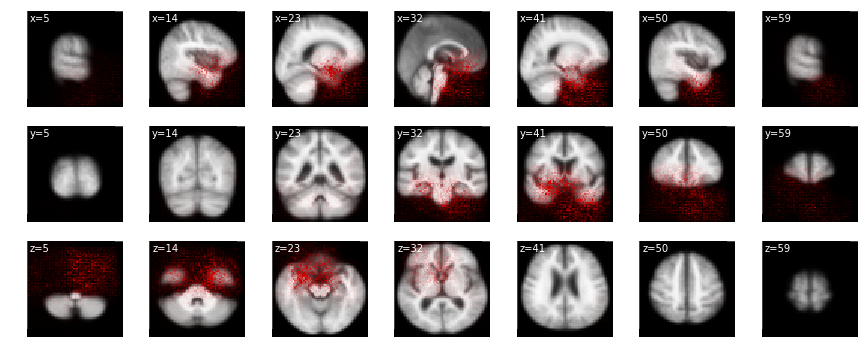

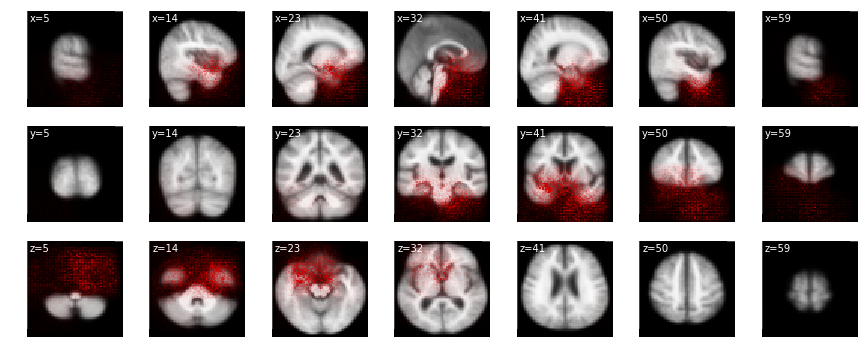

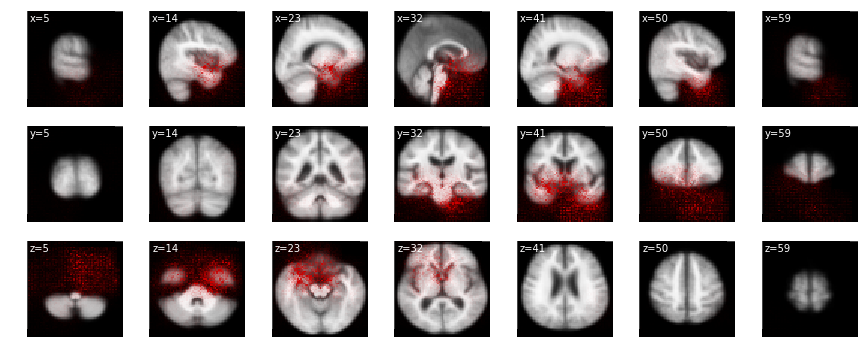

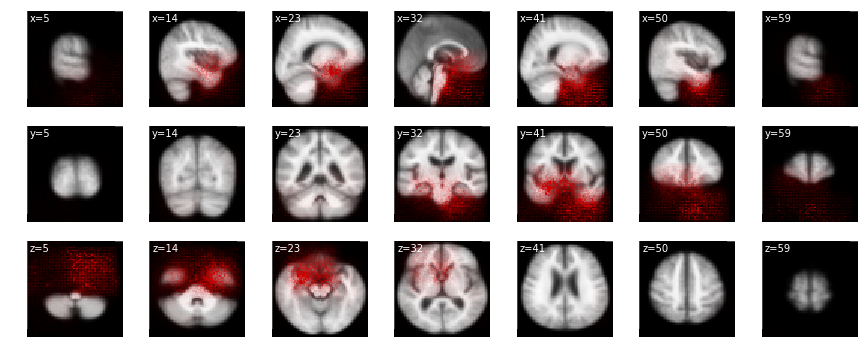

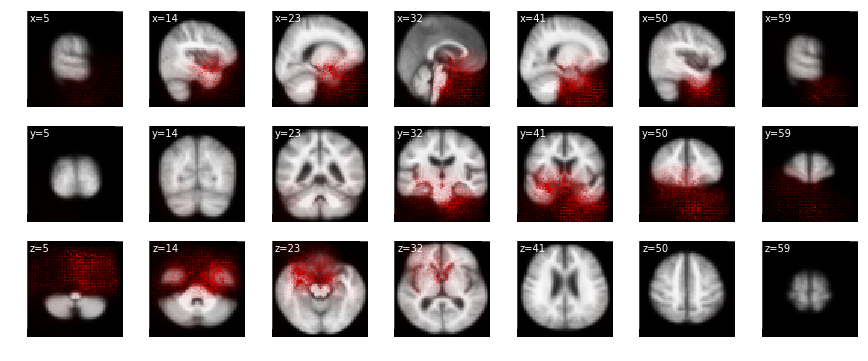

In [0]:
# now we plot the averaged maps, for each category!
# probably want to do some quantitative results with the vmin, vmax, overlay min/max
vmin_AD_correct, vmax_AD_correct, overlay_vmin_AD_correct, overlay_vmax_AD_correct = vis_utils.plot_slices(img_global, num_slices = 7, overlay=map_AD_correct[0], 
                  overlay_vmax=np.percentile(map_AD_correct, 99.9), 
                  overlay_cmap=vis_utils.alpha_to_red_cmap)

vmin_AD_wrong, vmax_AD_wrong, overlay_vmin_AD_wrong, overlay_vmax_AD_wrong = vis_utils.plot_slices(img_global, num_slices = 7, overlay=map_AD_wrong[0], 
                  overlay_vmax=np.percentile(map_AD_wrong, 99.9), 
                  overlay_cmap=vis_utils.alpha_to_red_cmap)

vmin_NC_correct, vmax_NC_correct, overlay_vmin_NC_correct, overlay_vmax_NC_correct = vis_utils.plot_slices(img_global, num_slices = 7, overlay=map_NC_correct[0], 
                  overlay_vmax=np.percentile(map_NC_correct, 99.9), 
                  overlay_cmap=vis_utils.alpha_to_red_cmap)

vmin_NC_wrong, vmax_NC_wrong, overlay_vmin_NC_wrong, overlay_vmax_NC_wrong = vis_utils.plot_slices(img_global, num_slices = 7, overlay=map_NC_wrong[0], 
                  overlay_vmax=np.percentile(map_NC_wrong, 99.9), 
                  overlay_cmap=vis_utils.alpha_to_red_cmap)

vmin_AD, vmax_AD, overlay_vmin_AD, overlay_vmax_AD = vis_utils.plot_slices(img_global, num_slices = 7, overlay=map_AD[0], 
                  overlay_vmax=np.percentile(map_AD, 99.9), 
                  overlay_cmap=vis_utils.alpha_to_red_cmap)

vmin_NC, vmax_NC, overlay_vmin_NC, overlay_vmax_NC = vis_utils.plot_slices(img_global, num_slices = 7, overlay=map_NC[0], 
                  overlay_vmax=np.percentile(map_NC, 99.9), 
                  overlay_cmap=vis_utils.alpha_to_red_cmap)


In [0]:
# get relevance areas across each category
from operator import itemgetter

res_AD_correct = dict(sorted(dict_AD_correct.items(), key = itemgetter(1), reverse = True)[:5])
res_AD_wrong = dict(sorted(dict_AD_wrong.items(), key = itemgetter(1), reverse = True)[:5])
res_NC_correct = dict(sorted(dict_NC_correct.items(), key = itemgetter(1), reverse = True)[:5])
res_NC_wrong = dict(sorted(dict_NC_wrong.items(), key = itemgetter(1), reverse = True)[:5])
res_AD = dict(sorted(dict_AD.items(), key = itemgetter(1), reverse = True)[:5])
res_NC = dict(sorted(dict_NC.items(), key = itemgetter(1), reverse = True)[:5])

print(res_AD_correct)
print(res_AD_wrong)
print(res_NC_correct)
print(res_NC_wrong)
print(res_AD)
print(res_NC)


{'Temporal_Inf': 4.89392992005215, 'Frontal_Inf_Orb': 3.780115549723092, 'Temporal_Pole_Mid': 3.021518925022182, 'Temporal_Mid': 2.9395225948636345, 'Insula': 2.8256062423876167}
{'Temporal_Inf': 2.1941449072609562, 'Frontal_Inf_Orb': 1.9355642721007063, 'Insula': 1.6995101128092265, 'Temporal_Mid': 1.4474034922143444, 'Putamen': 1.3037854908686}
{'Temporal_Inf': 9.29030289270787, 'Frontal_Inf_Orb': 8.217276973182642, 'Insula': 7.75605690533256, 'Temporal_Mid': 6.841020660903609, 'Frontal_Inf_Tri': 5.94893464238437}
{'Temporal_Inf': 1.0473720542417033, 'Frontal_Inf_Orb': 0.9038180321560559, 'Insula': 0.7612341104994467, 'Temporal_Mid': 0.7129489195223281, 'Temporal_Pole_Sup': 0.6484160887730299}
{'Temporal_Inf': 7.088074827313106, 'Frontal_Inf_Orb': 5.715679821823798, 'Insula': 4.525116355196843, 'Temporal_Mid': 4.386926087077979, 'Temporal_Pole_Mid': 4.1284665319534835}
{'Temporal_Inf': 10.337674946949575, 'Frontal_Inf_Orb': 9.121095005338699, 'Insula': 8.517291015832006, 'Temporal_Mi

# Guided backprop

In [0]:
# shape: (1, 64, 64, 64)
# relevance maps; to be averaged after summing
map_AD_correct = np.zeros((1, 64, 64, 64))
map_AD_wrong = np.zeros((1, 64, 64, 64))
map_NC_correct = np.zeros((1, 64, 64, 64))
map_NC_wrong = np.zeros((1, 64, 64, 64))
map_AD = np.zeros((1, 64, 64, 64))
map_NC = np.zeros((1, 64, 64, 64))

# counts... to keep track and average later
count_AD_correct = 0
count_AD_wrong = 0
count_NC_correct = 0
count_NC_wrong = 0
count_AD = 0
count_NC = 0

# average of test images
img_AD_correct = np.zeros((64, 64, 64))
img_AD_wrong = np.zeros((64, 64, 64))
img_NC_correct = np.zeros((64, 64, 64))
img_NC_wrong = np.zeros((64, 64, 64))
img_AD = np.zeros((64, 64, 64))
img_NC = np.zeros((64, 64, 64))
img_global = np.zeros((64, 64, 64)) # average of entire dataset

# dict of top brain areas; to be summed
dict_AD_correct = {}
dict_AD_wrong = {}
dict_NC_correct = {}
dict_NC_wrong = {}
dict_AD = {}
dict_NC = {}

for i in range(251):
  #if i % 20 == 0:
  print("i: ", i)
  label = test_label[i]
  relevance_map_backprop, pred_label, _ = interpretation.guided_backprop(confounder_mod, test_data[i], cuda=False, verbose=True)
  case = -1
  if label == 1 and pred_label == 1:
    case = 1
    count_AD_correct += 1
    img_AD_correct += test_data[i][0]
    map_AD_correct += relevance_map_backprop
  elif label == 1 and pred_label == 0:
    case = 2
    count_AD_wrong += 1
    img_AD_wrong += test_data[i][0]
    map_AD_wrong += relevance_map_backprop
  elif label == 0 and pred_label == 0:
    case = 3
    count_NC_correct += 1
    img_NC_correct += test_data[i][0]
    map_NC_correct += relevance_map_backprop
  elif label == 0 and pred_label == 1:
    case = 4
    count_NC_wrong += 1
    img_NC_wrong += test_data[i][0]
    map_NC_wrong += relevance_map_backprop
  else:
    print("entered invalid case with (label, pred_label) = ", label, pred_label)
  
  areas_top_ten = get_relevance_per_area(relevance_map_backprop[0])[:10]
  dict_example = None
  if case == 1:
    dict_example = dict_AD_correct
  elif case == 2:
    dict_example = dict_AD_wrong
  elif case == 3:
    dict_example = dict_NC_correct
  elif case == 4:
    dict_example = dict_NC_wrong
  else: 
    print("invalid case ", case)
  for (area, pct) in areas_top_ten:
    if area in dict_example:
      dict_example[area] += pct
    else:
      dict_example[area] = pct

i:  0
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
torch.Size([1, 64])
tensor([[-6.2697]], grad_fn=<AddmmBackward>) torch.Size([1, 1])
Image was classified as 0 with probability 0.9981107680359855
one hot output:  tensor([[[1.],
         [0.]]])
Removing 4 hook(s)
(116,)
i:  1
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
torch.Size([1, 64])
tensor([[-5.2246]], grad_fn=<AddmmBackward>) torch.Size([1, 1])
Image was classified as 0 with probability 0.9946462898515165
one hot output:  tensor([[[1.],
         [0.]]])
Removing 4 hook(s)
(116,)
i:  2
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(in

Removing 4 hook(s)
(116,)
i:  20
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
torch.Size([1, 64])
tensor([[-6.3541]], grad_fn=<AddmmBackward>) torch.Size([1, 1])
Image was classified as 0 with probability 0.9982634442858398
one hot output:  tensor([[[1.],
         [0.]]])
Removing 4 hook(s)
(116,)
i:  21
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
torch.Size([1, 64])
tensor([[-6.3673]], grad_fn=<AddmmBackward>) torch.Size([1, 1])
Image was classified as 0 with probability 0.9982860741438344
one hot output:  tensor([[[1.],
         [0.]]])
Removing 4 hook(s)
(116,)
i:  22
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Regis

Removing 4 hook(s)
(116,)
i:  40
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
torch.Size([1, 64])
tensor([[-4.2433]], grad_fn=<AddmmBackward>) torch.Size([1, 1])
Image was classified as 0 with probability 0.985842882655561
one hot output:  tensor([[[1.],
         [0.]]])
Removing 4 hook(s)
(116,)
i:  41
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
torch.Size([1, 64])
tensor([[-3.4229]], grad_fn=<AddmmBackward>) torch.Size([1, 1])
Image was classified as 0 with probability 0.9684119001030922
one hot output:  tensor([[[1.],
         [0.]]])
Removing 4 hook(s)
(116,)
i:  42
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Regist

Removing 4 hook(s)
(116,)
i:  60
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
torch.Size([1, 64])
tensor([[4.5601]], grad_fn=<AddmmBackward>) torch.Size([1, 1])
Image was classified as 1 with probability 0.9896475672721863
one hot output:  tensor([[[0.],
         [1.]]])
Removing 4 hook(s)
(116,)
i:  61
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
torch.Size([1, 64])
tensor([[-6.3674]], grad_fn=<AddmmBackward>) torch.Size([1, 1])
Image was classified as 0 with probability 0.9982862437609583
one hot output:  tensor([[[1.],
         [0.]]])
Removing 4 hook(s)
(116,)
i:  62
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Regist

Removing 4 hook(s)
(116,)
i:  80
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
torch.Size([1, 64])
tensor([[-4.8987]], grad_fn=<AddmmBackward>) torch.Size([1, 1])
Image was classified as 0 with probability 0.9925988079048693
one hot output:  tensor([[[1.],
         [0.]]])
Removing 4 hook(s)
(116,)
i:  81
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
torch.Size([1, 64])
tensor([[-2.4312]], grad_fn=<AddmmBackward>) torch.Size([1, 1])
Image was classified as 0 with probability 0.9191735535860062
one hot output:  tensor([[[1.],
         [0.]]])
Removing 4 hook(s)
(116,)
i:  82
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Regis

Removing 4 hook(s)
(116,)
i:  100
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
torch.Size([1, 64])
tensor([[1.8362]], grad_fn=<AddmmBackward>) torch.Size([1, 1])
Image was classified as 1 with probability 0.8624951243400574
one hot output:  tensor([[[0.],
         [1.]]])
Removing 4 hook(s)
(116,)
i:  101
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
torch.Size([1, 64])
tensor([[5.3899]], grad_fn=<AddmmBackward>) torch.Size([1, 1])
Image was classified as 1 with probability 0.9954583644866943
one hot output:  tensor([[[0.],
         [1.]]])
Removing 4 hook(s)
(116,)
i:  102
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Regi

Removing 4 hook(s)
(116,)
i:  120
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
torch.Size([1, 64])
tensor([[-6.3216]], grad_fn=<AddmmBackward>) torch.Size([1, 1])
Image was classified as 0 with probability 0.9982061285991222
one hot output:  tensor([[[1.],
         [0.]]])
Removing 4 hook(s)
(116,)
i:  121
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
torch.Size([1, 64])
tensor([[-6.3117]], grad_fn=<AddmmBackward>) torch.Size([1, 1])
Image was classified as 0 with probability 0.998188346857205
one hot output:  tensor([[[1.],
         [0.]]])
Removing 4 hook(s)
(116,)
i:  122
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Reg

Removing 4 hook(s)
(116,)
i:  140
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
torch.Size([1, 64])
tensor([[-5.0598]], grad_fn=<AddmmBackward>) torch.Size([1, 1])
Image was classified as 0 with probability 0.9936933438293636
one hot output:  tensor([[[1.],
         [0.]]])
Removing 4 hook(s)
(116,)
i:  141
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
torch.Size([1, 64])
tensor([[-6.0615]], grad_fn=<AddmmBackward>) torch.Size([1, 1])
Image was classified as 0 with probability 0.9976746027823538
one hot output:  tensor([[[1.],
         [0.]]])
Removing 4 hook(s)
(116,)
i:  142
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Re

Removing 4 hook(s)
(116,)
i:  160
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
torch.Size([1, 64])
tensor([[-3.8674]], grad_fn=<AddmmBackward>) torch.Size([1, 1])
Image was classified as 0 with probability 0.9795156307518482
one hot output:  tensor([[[1.],
         [0.]]])
Removing 4 hook(s)
(116,)
i:  161
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
torch.Size([1, 64])
tensor([[-5.8583]], grad_fn=<AddmmBackward>) torch.Size([1, 1])
Image was classified as 0 with probability 0.9971520532853901
one hot output:  tensor([[[1.],
         [0.]]])
Removing 4 hook(s)
(116,)
i:  162
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Re

Removing 4 hook(s)
(116,)
i:  180
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
torch.Size([1, 64])
tensor([[2.5794]], grad_fn=<AddmmBackward>) torch.Size([1, 1])
Image was classified as 1 with probability 0.9295220971107483
one hot output:  tensor([[[0.],
         [1.]]])
Removing 4 hook(s)
(116,)
i:  181
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
torch.Size([1, 64])
tensor([[4.8469]], grad_fn=<AddmmBackward>) torch.Size([1, 1])
Image was classified as 1 with probability 0.9922088384628296
one hot output:  tensor([[[0.],
         [1.]]])
Removing 4 hook(s)
(116,)
i:  182
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Regi

Removing 4 hook(s)
(116,)
i:  200
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
torch.Size([1, 64])
tensor([[-5.7452]], grad_fn=<AddmmBackward>) torch.Size([1, 1])
Image was classified as 0 with probability 0.9968122523277998
one hot output:  tensor([[[1.],
         [0.]]])
Removing 4 hook(s)
(116,)
i:  201
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
torch.Size([1, 64])
tensor([[-4.9946]], grad_fn=<AddmmBackward>) torch.Size([1, 1])
Image was classified as 0 with probability 0.9932713024318218
one hot output:  tensor([[[1.],
         [0.]]])
Removing 4 hook(s)
(116,)
i:  202
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Re

Removing 4 hook(s)
(116,)
i:  220
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
torch.Size([1, 64])
tensor([[5.9764]], grad_fn=<AddmmBackward>) torch.Size([1, 1])
Image was classified as 1 with probability 0.9974684715270996
one hot output:  tensor([[[0.],
         [1.]]])
Removing 4 hook(s)
(116,)
i:  221
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
torch.Size([1, 64])
tensor([[-6.3730]], grad_fn=<AddmmBackward>) torch.Size([1, 1])
Image was classified as 0 with probability 0.998295831028372
one hot output:  tensor([[[1.],
         [0.]]])
Removing 4 hook(s)
(116,)
i:  222
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Regi

Removing 4 hook(s)
(116,)
i:  240
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
torch.Size([1, 64])
tensor([[-5.0308]], grad_fn=<AddmmBackward>) torch.Size([1, 1])
Image was classified as 0 with probability 0.9935090006329119
one hot output:  tensor([[[1.],
         [0.]]])
Removing 4 hook(s)
(116,)
i:  241
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
torch.Size([1, 64])
tensor([[5.6711]], grad_fn=<AddmmBackward>) torch.Size([1, 1])
Image was classified as 1 with probability 0.9965676069259644
one hot output:  tensor([[[0.],
         [1.]]])
Removing 4 hook(s)
(116,)
i:  242
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Registered hook for layer: ReLU(inplace=True)
Reg

In [0]:
# some post-processing
map_AD = map_AD_correct + map_AD_wrong
map_NC = map_NC_correct + map_NC_wrong
count_AD = count_AD_correct + count_AD_wrong
count_NC = count_NC_correct + count_NC_wrong
img_AD = img_AD_correct + img_AD_wrong 
img_NC = img_NC_correct + img_NC_wrong
img_global = img_AD + img_NC

dict_AD = data.merge_dicts(dict_AD_correct, dict_AD_wrong)
dict_NC = data.merge_dicts(dict_NC_correct, dict_NC_wrong)

In [0]:
print(count_AD_correct, count_AD_wrong, count_NC_correct, count_NC_wrong)

57 32 148 14


In [0]:
# we need to average the maps across the number of examples that were summed up
map_AD_correct /= count_AD_correct
map_AD_wrong /= count_AD_wrong
map_NC_correct /= count_NC_correct
map_NC_wrong /= count_NC_wrong
map_AD /= count_AD
map_NC /= count_NC

# also average the images
img_AD_correct /= count_AD_correct
img_AD_wrong /= count_AD_wrong
img_NC_correct /= count_NC_correct
img_NC_wrong /= count_NC_wrong
img_AD /= count_AD
img_NC /= count_NC
img_global /= 251

-0.7620625321536576 1.9976536631661175 0.0 0.0029975968937394374
-0.7620625321536576 1.9976536631661175 0.0 0.0020099814230456173
-0.7620625321536576 1.9976536631661175 0.0 0.0007188104265684887
-0.7620625321536576 1.9976536631661175 0.0 0.006124377859177606
-0.7620625321536576 1.9976536631661175 0.0 0.002565718101448207
-0.7620625321536576 1.9976536631661175 0.0 0.0011524482476477278


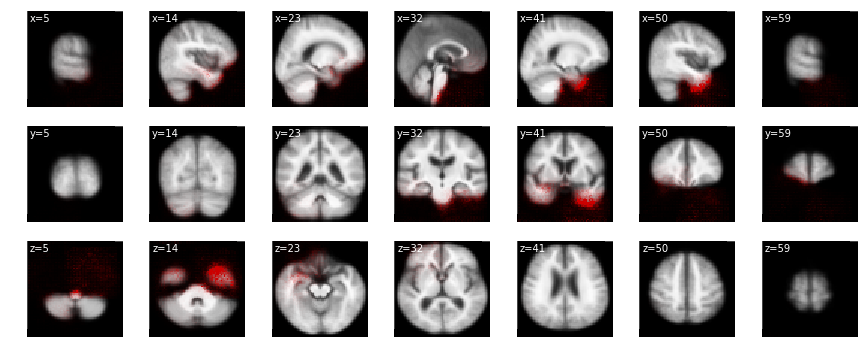

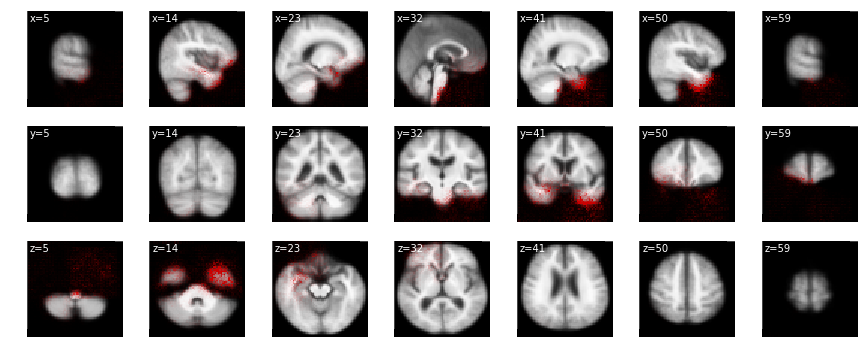

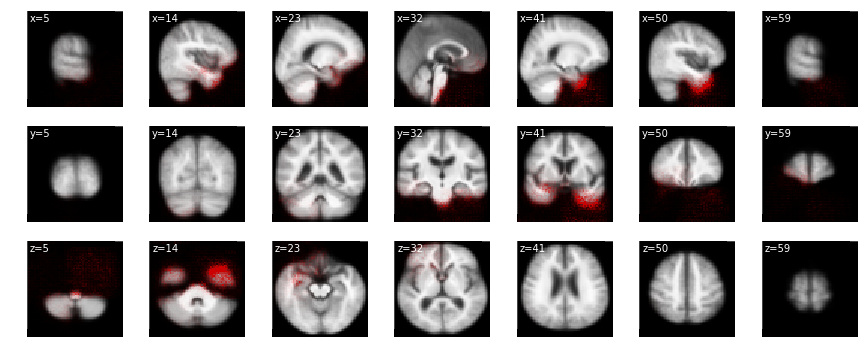

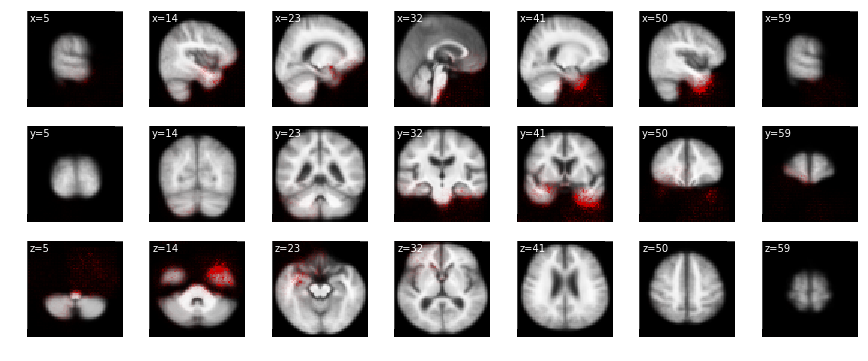

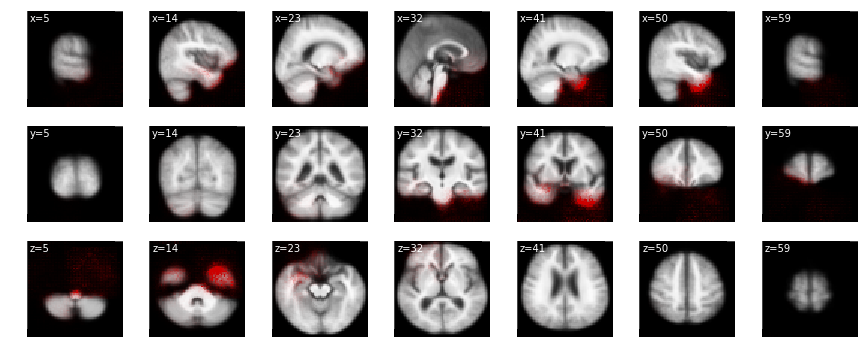

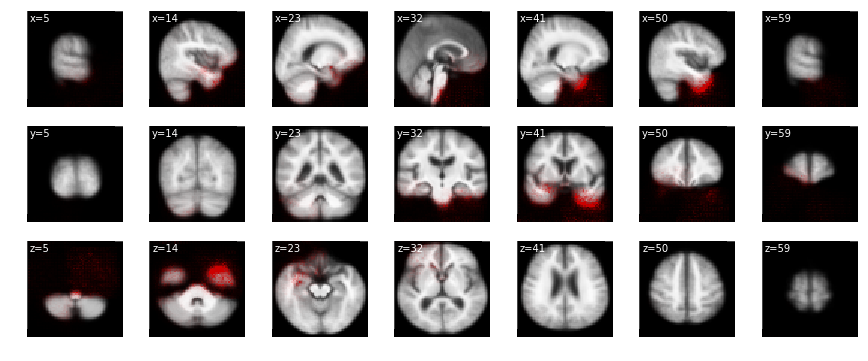

In [0]:
# now we plot the averaged maps, for each category!
# probably want to do some quantitative results with the vmin, vmax, overlay min/max
vmin_AD_correct, vmax_AD_correct, overlay_vmin_AD_correct, overlay_vmax_AD_correct = vis_utils.plot_slices(img_global, num_slices = 7, overlay=map_AD_correct[0], 
                  overlay_vmax=np.percentile(map_AD_correct, 99.9), 
                  overlay_cmap=vis_utils.alpha_to_red_cmap)

vmin_AD_wrong, vmax_AD_wrong, overlay_vmin_AD_wrong, overlay_vmax_AD_wrong = vis_utils.plot_slices(img_global, num_slices = 7, overlay=map_AD_wrong[0], 
                  overlay_vmax=np.percentile(map_AD_wrong, 99.9), 
                  overlay_cmap=vis_utils.alpha_to_red_cmap)

vmin_NC_correct, vmax_NC_correct, overlay_vmin_NC_correct, overlay_vmax_NC_correct = vis_utils.plot_slices(img_global, num_slices = 7, overlay=map_NC_correct[0], 
                  overlay_vmax=np.percentile(map_NC_correct, 99.9), 
                  overlay_cmap=vis_utils.alpha_to_red_cmap)

vmin_NC_wrong, vmax_NC_wrong, overlay_vmin_NC_wrong, overlay_vmax_NC_wrong = vis_utils.plot_slices(img_global, num_slices = 7, overlay=map_NC_wrong[0], 
                  overlay_vmax=np.percentile(map_NC_wrong, 99.9), 
                  overlay_cmap=vis_utils.alpha_to_red_cmap)

vmin_AD, vmax_AD, overlay_vmin_AD, overlay_vmax_AD = vis_utils.plot_slices(img_global, num_slices = 7, overlay=map_AD[0], 
                  overlay_vmax=np.percentile(map_AD, 99.9), 
                  overlay_cmap=vis_utils.alpha_to_red_cmap)

vmin_NC, vmax_NC, overlay_vmin_NC, overlay_vmax_NC = vis_utils.plot_slices(img_global, num_slices = 7, overlay=map_NC[0], 
                  overlay_vmax=np.percentile(map_NC, 99.9), 
                  overlay_cmap=vis_utils.alpha_to_red_cmap)

In [0]:
# get relevance areas across each category
from operator import itemgetter

res_AD_correct = dict(sorted(dict_AD_correct.items(), key = itemgetter(1), reverse = True)[:5])
res_AD_wrong = dict(sorted(dict_AD_wrong.items(), key = itemgetter(1), reverse = True)[:5])
res_NC_correct = dict(sorted(dict_NC_correct.items(), key = itemgetter(1), reverse = True)[:5])
res_NC_wrong = dict(sorted(dict_NC_wrong.items(), key = itemgetter(1), reverse = True)[:5])
res_AD = dict(sorted(dict_AD.items(), key = itemgetter(1), reverse = True)[:5])
res_NC = dict(sorted(dict_NC.items(), key = itemgetter(1), reverse = True)[:5])

print(res_AD_correct)
print(res_AD_wrong)
print(res_NC_correct)
print(res_NC_wrong)
print(res_AD)
print(res_NC)

{'Temporal_Inf': 7.241930771142623, 'Temporal_Pole_Mid': 6.435947950195599, 'Frontal_Inf_Orb': 6.078790755216756, 'Temporal_Pole_Sup': 5.150575224506413, 'Temporal_Mid': 3.6336554246223036}
{'Temporal_Inf': 3.747257616642584, 'Temporal_Pole_Mid': 2.988038656572448, 'Frontal_Inf_Orb': 2.968795313782426, 'Temporal_Pole_Sup': 2.079804731227366, 'Temporal_Mid': 1.9259272019610392}
{'Temporal_Inf': 14.93839631624026, 'Frontal_Inf_Orb': 8.912053307208692, 'Temporal_Mid': 8.598547562189347, 'Temporal_Pole_Mid': 8.34812982891734, 'Temporal_Pole_Sup': 5.627328649230054}
{'Temporal_Inf': 1.6463438726030004, 'Temporal_Pole_Mid': 1.5577836149728226, 'Frontal_Inf_Orb': 1.4923105474046088, 'Temporal_Pole_Sup': 1.1586521524081632, 'Temporal_Mid': 0.8159622707646166}
{'Temporal_Inf': 10.989188387785207, 'Temporal_Pole_Mid': 9.423986606768047, 'Frontal_Inf_Orb': 9.047586068999182, 'Temporal_Pole_Sup': 7.230379955733779, 'Temporal_Mid': 5.559582626583342}
{'Temporal_Inf': 16.58474018884326, 'Frontal_Inf

# Occlusion

In [0]:
# shape: (1, 64, 64, 64)
# relevance maps; to be averaged after summing
map_AD_correct = np.zeros((1, 64, 64, 64))
map_AD_wrong = np.zeros((1, 64, 64, 64))
map_NC_correct = np.zeros((1, 64, 64, 64))
map_NC_wrong = np.zeros((1, 64, 64, 64))
map_AD = np.zeros((1, 64, 64, 64))
map_NC = np.zeros((1, 64, 64, 64))

# counts... to keep track and average later
count_AD_correct = 0
count_AD_wrong = 0
count_NC_correct = 0
count_NC_wrong = 0
count_AD = 0
count_NC = 0

# average of test images
img_AD_correct = np.zeros((64, 64, 64))
img_AD_wrong = np.zeros((64, 64, 64))
img_NC_correct = np.zeros((64, 64, 64))
img_NC_wrong = np.zeros((64, 64, 64))
img_AD = np.zeros((64, 64, 64))
img_NC = np.zeros((64, 64, 64))
img_global = np.zeros((64, 64, 64)) # average of entire dataset

# dict of top brain areas; to be summed
dict_AD_correct = {}
dict_AD_wrong = {}
dict_NC_correct = {}
dict_NC_wrong = {}
dict_AD = {}
dict_NC = {}

for i in range(251):
  #if i % 20 == 0:
  print("i: ", i)
  label = test_label[i]
  relevance_map_backprop, pred_label, _ = interpretation.occlusion(confounder_mod, test_data[i], size=8, stride=8, cuda=False, resize=True, verbose=True)
  case = -1
  if label == 1 and pred_label == 1:
    case = 1
    count_AD_correct += 1
    img_AD_correct += test_data[i][0]
    map_AD_correct += relevance_map_backprop
  elif label == 1 and pred_label == 0:
    case = 2
    count_AD_wrong += 1
    img_AD_wrong += test_data[i][0]
    map_AD_wrong += relevance_map_backprop
  elif label == 0 and pred_label == 0:
    case = 3
    count_NC_correct += 1
    img_NC_correct += test_data[i][0]
    map_NC_correct += relevance_map_backprop
  elif label == 0 and pred_label == 1:
    case = 4
    count_NC_wrong += 1
    img_NC_wrong += test_data[i][0]
    map_NC_wrong += relevance_map_backprop
  else:
    print("entered invalid case with (label, pred_label) = ", label, pred_label)
  
  areas_top_ten = get_relevance_per_area(relevance_map_backprop[0])[:10]
  dict_example = None
  if case == 1:
    dict_example = dict_AD_correct
  elif case == 2:
    dict_example = dict_AD_wrong
  elif case == 3:
    dict_example = dict_NC_correct
  elif case == 4:
    dict_example = dict_NC_wrong
  else: 
    print("invalid case ", case)
  for (area, pct) in areas_top_ten:
    if area in dict_example:
      dict_example[area] += pct
    else:
      dict_example[area] = pct

i:  0
three_d:  True
torch.Size([1, 64])
Image was classified as 0 with probability 0.9981107680359855


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


In [0]:
# some post-processing
map_AD = map_AD_correct + map_AD_wrong
map_NC = map_NC_correct + map_NC_wrong
count_AD = count_AD_correct + count_AD_wrong
count_NC = count_NC_correct + count_NC_wrong
img_AD = img_AD_correct + img_AD_wrong 
img_NC = img_NC_correct + img_NC_wrong
img_global = img_AD + img_NC

dict_AD = data.merge_dicts(dict_AD_correct, dict_AD_wrong)
dict_NC = data.merge_dicts(dict_NC_correct, dict_NC_wrong)

In [0]:
print(count_AD_correct, count_AD_wrong, count_NC_correct, count_NC_wrong)

57 32 148 14


In [0]:
# we need to average the maps across the number of examples that were summed up
map_AD_correct /= count_AD_correct
map_AD_wrong /= count_AD_wrong
map_NC_correct /= count_NC_correct
map_NC_wrong /= count_NC_wrong
map_AD /= count_AD
map_NC /= count_NC

# also average the images
img_AD_correct /= count_AD_correct
img_AD_wrong /= count_AD_wrong
img_NC_correct /= count_NC_correct
img_NC_wrong /= count_NC_wrong
img_AD /= count_AD
img_NC /= count_NC
img_global /= 251

-0.7620625321536576 1.9976536631661175 0.0 0.15538734318525121
-0.7620625321536576 1.9976536631661175 0.0 0.11562773868718068
-0.7620625321536576 1.9976536631661175 0.0 0.03927402621185457
-0.7620625321536576 1.9976536631661175 0.0 0.4978396731561848
-0.7620625321536576 1.9976536631661175 3.6453195125534294e-06 0.10057722906623914
-0.7620625321536576 1.9976536631661175 2.432752538610388e-06 0.052011964908789524


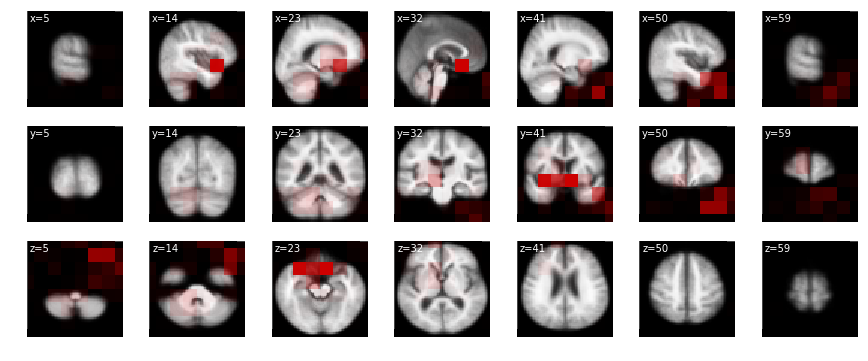

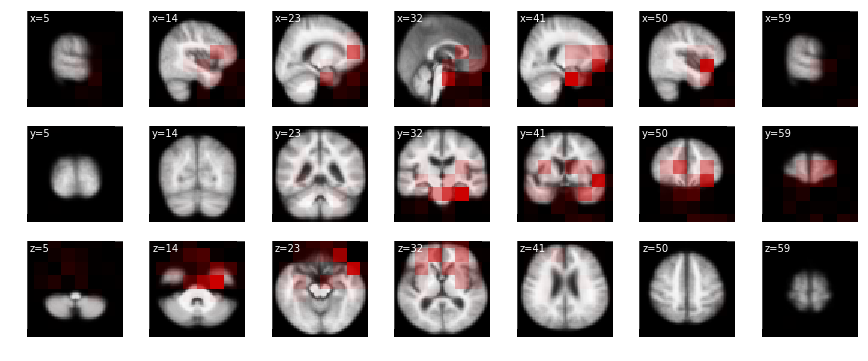

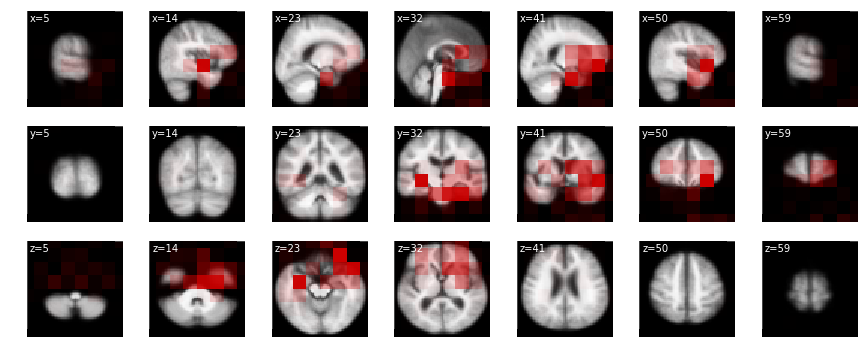

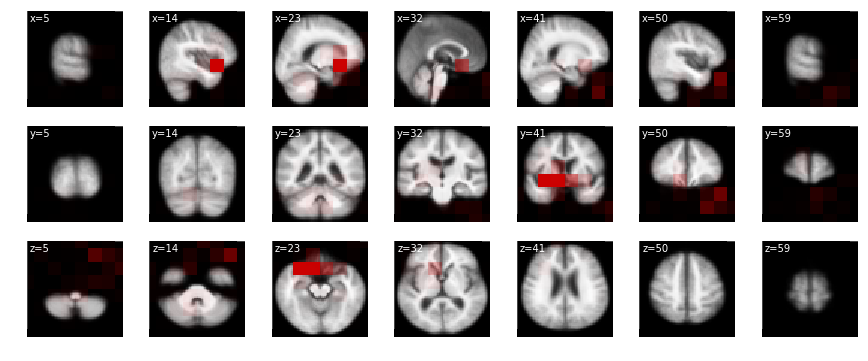

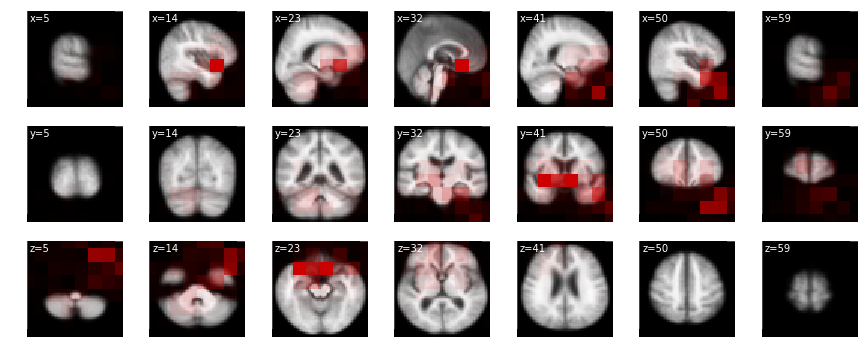

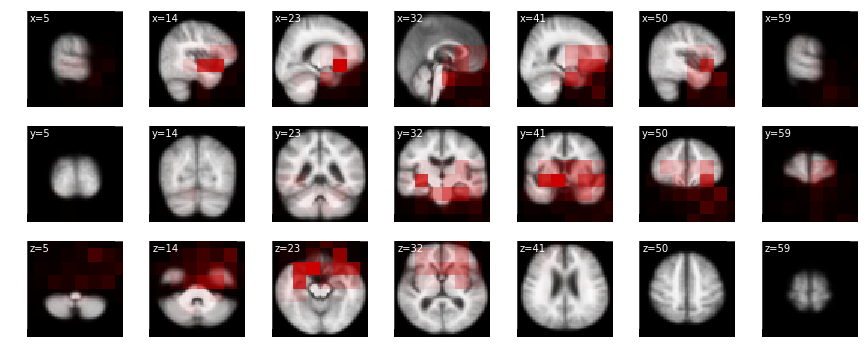

In [0]:
# now we plot the averaged maps, for each category!
# probably want to do some quantitative results with the vmin, vmax, overlay min/max
vmin_AD_correct, vmax_AD_correct, overlay_vmin_AD_correct, overlay_vmax_AD_correct = vis_utils.plot_slices(img_global, num_slices = 7, overlay=map_AD_correct[0], 
                  overlay_vmax=np.percentile(map_AD_correct, 99.9), 
                  overlay_cmap=vis_utils.alpha_to_red_cmap)

vmin_AD_wrong, vmax_AD_wrong, overlay_vmin_AD_wrong, overlay_vmax_AD_wrong = vis_utils.plot_slices(img_global, num_slices = 7, overlay=map_AD_wrong[0], 
                  overlay_vmax=np.percentile(map_AD_wrong, 99.9), 
                  overlay_cmap=vis_utils.alpha_to_red_cmap)

vmin_NC_correct, vmax_NC_correct, overlay_vmin_NC_correct, overlay_vmax_NC_correct = vis_utils.plot_slices(img_global, num_slices = 7, overlay=map_NC_correct[0], 
                  overlay_vmax=np.percentile(map_NC_correct, 99.9), 
                  overlay_cmap=vis_utils.alpha_to_red_cmap)

vmin_NC_wrong, vmax_NC_wrong, overlay_vmin_NC_wrong, overlay_vmax_NC_wrong = vis_utils.plot_slices(img_global, num_slices = 7, overlay=map_NC_wrong[0], 
                  overlay_vmax=np.percentile(map_NC_wrong, 99.9), 
                  overlay_cmap=vis_utils.alpha_to_red_cmap)

vmin_AD, vmax_AD, overlay_vmin_AD, overlay_vmax_AD = vis_utils.plot_slices(img_global, num_slices = 7, overlay=map_AD[0], 
                  overlay_vmax=np.percentile(map_AD, 99.9), 
                  overlay_cmap=vis_utils.alpha_to_red_cmap)

vmin_NC, vmax_NC, overlay_vmin_NC, overlay_vmax_NC = vis_utils.plot_slices(img_global, num_slices = 7, overlay=map_NC[0], 
                  overlay_vmax=np.percentile(map_NC, 99.9), 
                  overlay_cmap=vis_utils.alpha_to_red_cmap)

In [0]:
# get relevance areas across each category
from operator import itemgetter

res_AD_correct = dict(sorted(dict_AD_correct.items(), key = itemgetter(1), reverse = True)[:5])
res_AD_wrong = dict(sorted(dict_AD_wrong.items(), key = itemgetter(1), reverse = True)[:5])
res_NC_correct = dict(sorted(dict_NC_correct.items(), key = itemgetter(1), reverse = True)[:5])
res_NC_wrong = dict(sorted(dict_NC_wrong.items(), key = itemgetter(1), reverse = True)[:5])
res_AD = dict(sorted(dict_AD.items(), key = itemgetter(1), reverse = True)[:5])
res_NC = dict(sorted(dict_NC.items(), key = itemgetter(1), reverse = True)[:5])

print(res_AD_correct)
print(res_AD_wrong)
print(res_NC_correct)
print(res_NC_wrong)
print(res_AD)
print(res_NC)

{'Temporal_Inf': 6.49135542722811, 'Frontal_Inf_Orb': 5.149803577619578, 'Temporal_Mid': 4.200453047274278, 'Fusiform': 3.934891645075027, 'Temporal_Pole_Sup': 3.762107771757587}
{'Temporal_Mid': 2.906171047687888, 'Temporal_Sup': 2.303391129580588, 'Frontal_Mid': 1.9325040112864187, 'Temporal_Inf': 1.0679250878849165, 'Frontal_Sup': 1.06394270658806}
{'Temporal_Mid': 18.455157397359343, 'Temporal_Sup': 13.098221643372314, 'Lingual': 6.069455439851736, 'Temporal_Inf': 5.738474139810295, 'Thalamus': 4.351579724041092}
{'Temporal_Inf': 1.395706250499898, 'Frontal_Inf_Orb': 1.3585239430293463, 'Temporal_Mid': 1.0541239942201919, 'Temporal_Pole_Sup': 1.037401389949793, 'Fusiform': 0.841277730997041}
{'Temporal_Inf': 7.559280515113027, 'Temporal_Mid': 7.106624094962166, 'Frontal_Inf_Orb': 5.149803577619578, 'Fusiform': 4.61145900168375, 'Temporal_Pole_Sup': 3.762107771757587}
{'Temporal_Mid': 19.509281391579535, 'Temporal_Sup': 13.136188154037871, 'Temporal_Inf': 7.134180390310193, 'Lingual

# Brain area occlusion

In [7]:
# shape: (1, 64, 64, 64)
# relevance maps; to be averaged after summing
map_AD_correct = np.zeros((1, 64, 64, 64))
map_AD_wrong = np.zeros((1, 64, 64, 64))
map_NC_correct = np.zeros((1, 64, 64, 64))
map_NC_wrong = np.zeros((1, 64, 64, 64))
map_AD = np.zeros((1, 64, 64, 64))
map_NC = np.zeros((1, 64, 64, 64))

# counts... to keep track and average later
count_AD_correct = 0
count_AD_wrong = 0
count_NC_correct = 0
count_NC_wrong = 0
count_AD = 0
count_NC = 0

# average of test images
img_AD_correct = np.zeros((64, 64, 64))
img_AD_wrong = np.zeros((64, 64, 64))
img_NC_correct = np.zeros((64, 64, 64))
img_NC_wrong = np.zeros((64, 64, 64))
img_AD = np.zeros((64, 64, 64))
img_NC = np.zeros((64, 64, 64))
img_global = np.zeros((64, 64, 64)) # average of entire dataset

# dict of top brain areas; to be summed
dict_AD_correct = {}
dict_AD_wrong = {}
dict_NC_correct = {}
dict_NC_wrong = {}
dict_AD = {}
dict_NC = {}

for i in range(251):
  #if i % 20 == 0:
  print("i: ", i)
  label = test_label[i]
  relevance_map_backprop, pred_label, _ = interpretation.area_occlusion(confounder_mod, test_data[i], area_masks, cuda=False, verbose=True)
  case = -1
  if label == 1 and pred_label == 1:
    case = 1
    count_AD_correct += 1
    img_AD_correct += test_data[i][0]
    map_AD_correct += relevance_map_backprop
  elif label == 1 and pred_label == 0:
    case = 2
    count_AD_wrong += 1
    img_AD_wrong += test_data[i][0]
    map_AD_wrong += relevance_map_backprop
  elif label == 0 and pred_label == 0:
    case = 3
    count_NC_correct += 1
    img_NC_correct += test_data[i][0]
    map_NC_correct += relevance_map_backprop
  elif label == 0 and pred_label == 1:
    case = 4
    count_NC_wrong += 1
    img_NC_wrong += test_data[i][0]
    map_NC_wrong += relevance_map_backprop
  else:
    print("entered invalid case with (label, pred_label) = ", label, pred_label)
  
  areas_top_ten = get_relevance_per_area(relevance_map_backprop)[:10]
  dict_example = None
  if case == 1:
    dict_example = dict_AD_correct
  elif case == 2:
    dict_example = dict_AD_wrong
  elif case == 3:
    dict_example = dict_NC_correct
  elif case == 4:
    dict_example = dict_NC_wrong
  else: 
    print("invalid case ", case)
  for (area, pct) in areas_top_ten:
    if area in dict_example:
      dict_example[area] += pct
    else:
      dict_example[area] = pct

i:  0
torch.Size([1, 64])
Image was classified as 0 with probability 0.9981107680359855
image tensor:  torch.Size([1, 64, 64, 64])
relevance map:  torch.Size([64, 64, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])
torch.Size([1, 64])


In [8]:
# some post-processing
map_AD = map_AD_correct + map_AD_wrong
map_NC = map_NC_correct + map_NC_wrong
count_AD = count_AD_correct + count_AD_wrong
count_NC = count_NC_correct + count_NC_wrong
img_AD = img_AD_correct + img_AD_wrong 
img_NC = img_NC_correct + img_NC_wrong
img_global = img_AD + img_NC

dict_AD = data.merge_dicts(dict_AD_correct, dict_AD_wrong)
dict_NC = data.merge_dicts(dict_NC_correct, dict_NC_wrong)

In [9]:
print(count_AD_correct, count_AD_wrong, count_NC_correct, count_NC_wrong)

57 32 148 14


In [10]:
# we need to average the maps across the number of examples that were summed up
map_AD_correct /= count_AD_correct
map_AD_wrong /= count_AD_wrong
map_NC_correct /= count_NC_correct
map_NC_wrong /= count_NC_wrong
map_AD /= count_AD
map_NC /= count_NC

# also average the images
img_AD_correct /= count_AD_correct
img_AD_wrong /= count_AD_wrong
img_NC_correct /= count_NC_correct
img_NC_wrong /= count_NC_wrong
img_AD /= count_AD
img_NC /= count_NC
img_global /= 251

-0.7620625321536576 1.9976536631661175 0.0 0.15942266531157911
-0.7620625321536576 1.9976536631661175 0.0 0.32648069462084095
-0.7620625321536576 1.9976536631661175 0.0 0.06068644203195298
-0.7620625321536576 1.9976536631661175 0.0 0.5892535320350102
-0.7620625321536576 1.9976536631661175 0.0 0.12050404593615342
-0.7620625321536576 1.9976536631661175 0.0 0.060213183156318136


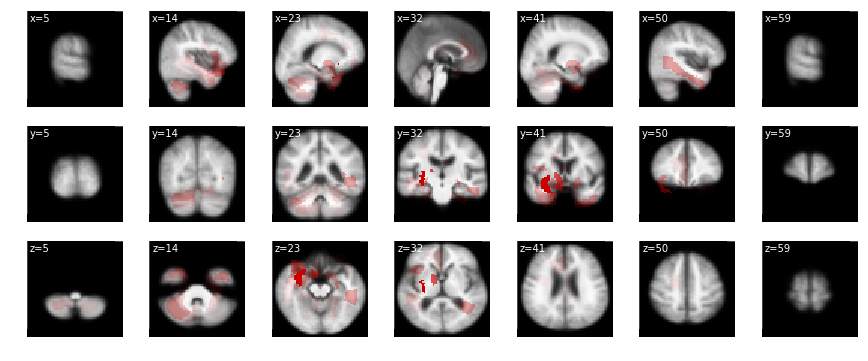

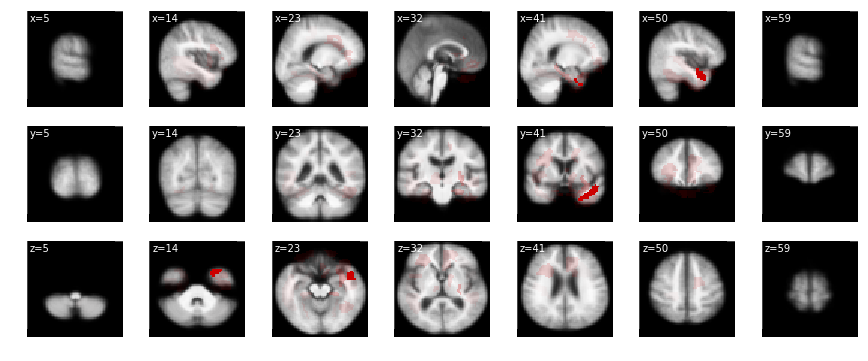

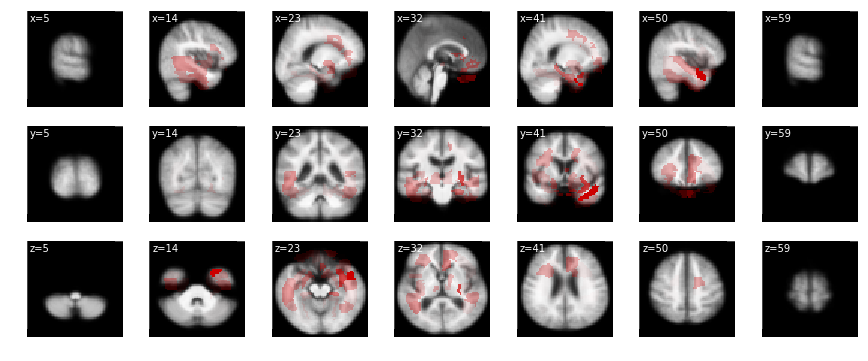

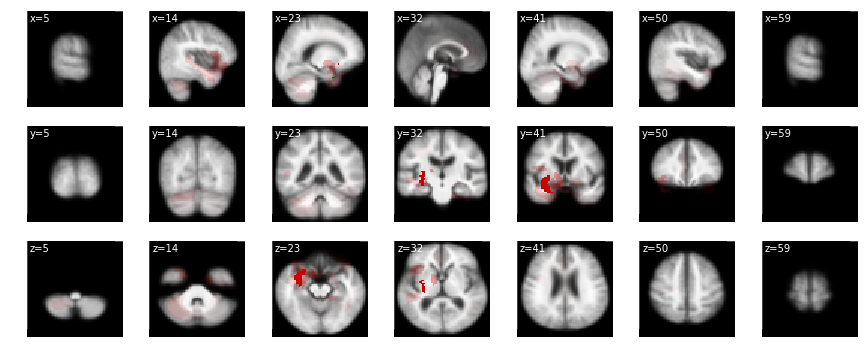

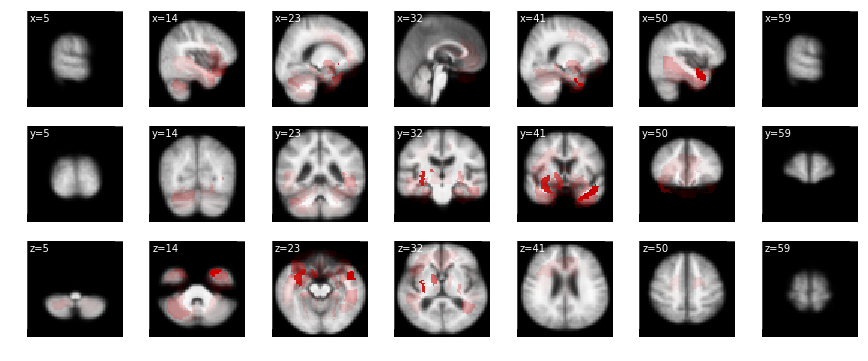

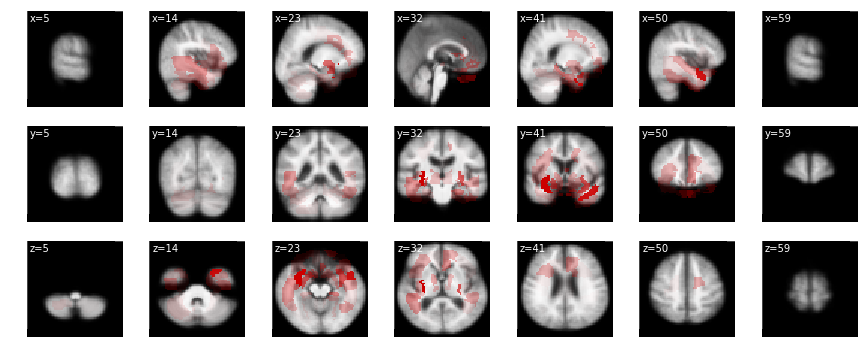

In [11]:
# now we plot the averaged maps, for each category!
# probably want to do some quantitative results with the vmin, vmax, overlay min/max
vmin_AD_correct, vmax_AD_correct, overlay_vmin_AD_correct, overlay_vmax_AD_correct = vis_utils.plot_slices(img_global, num_slices = 7, overlay=map_AD_correct[0], 
                  overlay_vmax=np.percentile(map_AD_correct, 99.9), 
                  overlay_cmap=vis_utils.alpha_to_red_cmap)

vmin_AD_wrong, vmax_AD_wrong, overlay_vmin_AD_wrong, overlay_vmax_AD_wrong = vis_utils.plot_slices(img_global, num_slices = 7, overlay=map_AD_wrong[0], 
                  overlay_vmax=np.percentile(map_AD_wrong, 99.9), 
                  overlay_cmap=vis_utils.alpha_to_red_cmap)

vmin_NC_correct, vmax_NC_correct, overlay_vmin_NC_correct, overlay_vmax_NC_correct = vis_utils.plot_slices(img_global, num_slices = 7, overlay=map_NC_correct[0], 
                  overlay_vmax=np.percentile(map_NC_correct, 99.9), 
                  overlay_cmap=vis_utils.alpha_to_red_cmap)

vmin_NC_wrong, vmax_NC_wrong, overlay_vmin_NC_wrong, overlay_vmax_NC_wrong = vis_utils.plot_slices(img_global, num_slices = 7, overlay=map_NC_wrong[0], 
                  overlay_vmax=np.percentile(map_NC_wrong, 99.9), 
                  overlay_cmap=vis_utils.alpha_to_red_cmap)

vmin_AD, vmax_AD, overlay_vmin_AD, overlay_vmax_AD = vis_utils.plot_slices(img_global, num_slices = 7, overlay=map_AD[0], 
                  overlay_vmax=np.percentile(map_AD, 99.9), 
                  overlay_cmap=vis_utils.alpha_to_red_cmap)

vmin_NC, vmax_NC, overlay_vmin_NC, overlay_vmax_NC = vis_utils.plot_slices(img_global, num_slices = 7, overlay=map_NC[0], 
                  overlay_vmax=np.percentile(map_NC, 99.9), 
                  overlay_cmap=vis_utils.alpha_to_red_cmap)

In [12]:
# get relevance areas across each category
from operator import itemgetter

res_AD_correct = dict(sorted(dict_AD_correct.items(), key = itemgetter(1), reverse = True)[:5])
res_AD_wrong = dict(sorted(dict_AD_wrong.items(), key = itemgetter(1), reverse = True)[:5])
res_NC_correct = dict(sorted(dict_NC_correct.items(), key = itemgetter(1), reverse = True)[:5])
res_NC_wrong = dict(sorted(dict_NC_wrong.items(), key = itemgetter(1), reverse = True)[:5])
res_AD = dict(sorted(dict_AD.items(), key = itemgetter(1), reverse = True)[:5])
res_NC = dict(sorted(dict_NC.items(), key = itemgetter(1), reverse = True)[:5])

print(res_AD_correct)
print(res_AD_wrong)
print(res_NC_correct)
print(res_NC_wrong)
print(res_AD)
print(res_NC)

{'Insula': 11.444230327865194, 'Temporal_Mid': 9.005976587108409, 'Frontal_Inf_Orb': 3.2651548767949214, 'Temporal_Pole_Sup': 2.7145003524094116, 'Cerebelum_Crus1': 2.601996193998004}
{'Temporal_Pole_Sup': 10.122342951259755, 'Insula': 2.7304750077278213, 'Temporal_Sup': 2.3749990982752758, 'Temporal_Inf': 2.086107946698024, 'Temporal_Mid': 2.0113290628304807}
{'Temporal_Pole_Sup': 17.64654069660287, 'Temporal_Sup': 17.459700526890668, 'Temporal_Mid': 16.940696582970908, 'Insula': 14.777347905536537, 'Frontal_Mid': 10.29505261533827}
{'Insula': 6.217402606947333, 'Frontal_Inf_Tri': 0.7073614880134437, 'Frontal_Inf_Orb': 0.6712145489078116, 'Putamen': 0.6256261924922752, 'Temporal_Pole_Sup': 0.5923700792143053}
{'Insula': 14.174705335593014, 'Temporal_Pole_Sup': 12.836843303669166, 'Temporal_Mid': 11.017305649938889, 'Temporal_Sup': 4.16783629670253, 'Frontal_Inf_Orb': 3.684262180019031}
{'Insula': 20.99475051248387, 'Temporal_Pole_Sup': 18.238910775817175, 'Temporal_Sup': 17.9676672994